<a href="https://colab.research.google.com/github/bladesu/mask_image_pretrain_on_colab/blob/master/darknet_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect to GOOGLE drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Check GPU configuration in current colab VM.**

In [0]:
!nvidia-smi

Wed May 20 02:23:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

**Clone darknet implementation by AlexeyAB.**

In [0]:
! git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 13503 (delta 0), reused 1 (delta 0), pack-reused 13498
Receiving objects: 100% (13503/13503), 12.07 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (9222/9222), done.




```
Change Makefile, Original version should be:
======================================
GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0 # ZED SDK 3.0 and above
ZED_CAMERA_v2_8=0 # ZED SDK 2.X
======================================
```



**Modification about Makefile**

In [0]:
!# head darknet/Makefile
!sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile
!head darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0 # ZED SDK 3.0 and above
ZED_CAMERA_v2_8=0 # ZED SDK 2.X



**Complie project now!**

In [0]:
! cd darknet; make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

**Check built project with pretrained data**

In [0]:
! cd /content/; gdown https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
! cd /content/darknet/; ./darknet detect /content/darknet/cfg/yolov4.cfg /content/yolov4.weights /content/darknet/data/dog.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 

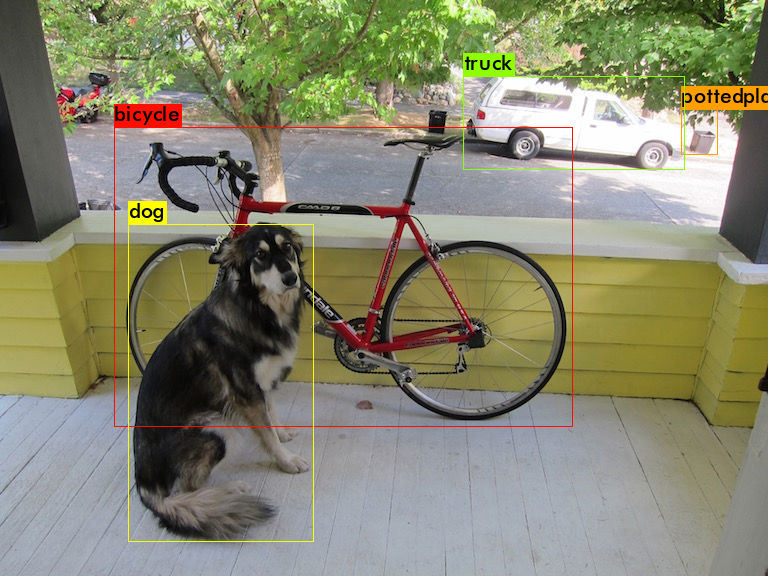

In [0]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')

**Download dataset in kaggle if necessary.
destination: /content/drive/My Drive/dataset/people_wt_mask/**

In [0]:
! cp "/content/drive/My Drive/dataset/people_wt_mask/medical-masks-dataset.zip" /content/

In [0]:
! unzip /content/medical-masks-dataset.zip > data_unzip.log

**Check data**

In [0]:
! cat /content/labels/012106.jpg_1140x855.xml

<annotation>
	<folder>images</folder>
	<filename>012106.jpg_1140x855.jpg</filename>
	<path>P:\mask_mouth\images\012106.jpg_1140x855.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1140</width>
		<height>855</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>654</xmin>
			<ymin>275</ymin>
			<xmax>910</xmax>
			<ymax>517</ymax>
		</bndbox>
	</object>
</annotation>


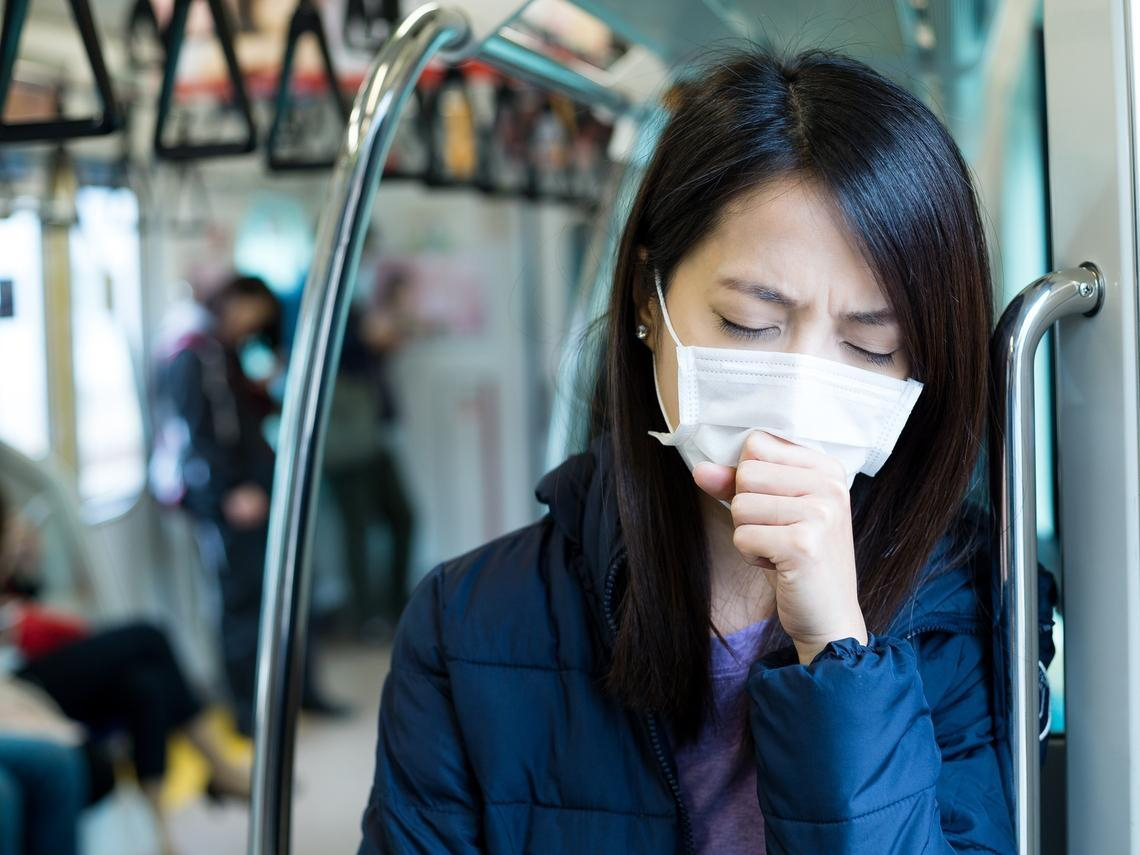

In [0]:
from PIL import Image
img = Image.open('/content/images/012106.jpg_1140x855.jpg')
img

In [0]:
! cat /content/labels/0602623232127-web-tete.xml

<annotation>
	<folder>images</folder>
	<filename>0602623232127-web-tete.jpg</filename>
	<path>P:\mask_mouth\images\0602623232127-web-tete.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1280</width>
		<height>720</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>134</xmin>
			<ymin>84</ymin>
			<xmax>220</xmax>
			<ymax>166</ymax>
		</bndbox>
	</object>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>420</xmin>
			<ymin>16</ymin>
			<xmax>460</xmax>
			<ymax>63</ymax>
		</bndbox>
	</object>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>610</xmin>
			<ymin>26</ymin>
			<xmax>656</xmax>
			<ymax>77</ymax>
		</bndbox>
	</object>
	<object>
		<name>good</n

In [0]:
! rm -rf /content/yolo
! mkdir /content/yolo

In [0]:
from bs4 import BeautifulSoup
import os
import shutil

status_dic = {'good': 2, 'bad': 1, 'none': 0}
def getYoloFormat(filename,label_path, img_path, yolo_path, newname):
    with open(label_path+ filename, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')
        imgname = soup.select_one('filename').text
        image_w = int(soup.select_one('width').text)
        image_h = int(soup.select_one('height').text)
        ary = []
        for obj in soup.select('object'):
            xmin = int(obj.select_one('xmin').text)
            xmax = int(obj.select_one('xmax').text)
            ymin = int(obj.select_one('ymin').text)
            ymax = int(obj.select_one('ymax').text)
            objclass = status_dic.get(obj.select_one('name').text)

            x = (xmin + (xmax-xmin)/2) * 1.0 / image_w
            y = (ymin + (ymax-ymin)/2) * 1.0 / image_h
            w = (xmax-xmin) * 1.0 / image_w
            h = (ymax-ymin) * 1.0 / image_h
            ary.append(' '.join([str(objclass), str(x),str(y),str(w),str(h)]))
        if os.path.exists(img_path + imgname):
            shutil.copyfile(img_path + imgname, yolo_path + newname + '.jpg')
            with open(yolo_path + newname + '.txt', 'w') as f:
                f.write('\n'.join(ary))

In [0]:
import os
labelpath = '/content/labels/'
imgpath   = '/content/images/'
yolopath  = '/content/yolo/'
ary = []
for idx, f in enumerate(os.listdir(labelpath)):
    try:
        getYoloFormat(f, labelpath,imgpath, yolopath, str(idx))
    except Exception as e:
        print(e)

float division by zero


In [0]:
! cat /content/yolo/0.txt

2 0.27066666666666667 0.2817777777777778 0.08666666666666667 0.1368888888888889
2 0.49933333333333335 0.288 0.10533333333333333 0.14755555555555555
2 0.709 0.3257777777777778 0.078 0.10933333333333334
2 0.801 0.34933333333333333 0.102 0.13155555555555556

**Prepare test set and training set**

In [0]:
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [0]:
import os
datasets = ['/content/yolo/'+ f for f in os.listdir('/content/yolo/') if not f.endswith('.txt')]
len(datasets) * 0.8

541.6

In [0]:
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:540]))

In [0]:
with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[540:]))

**Copy parameters**

In [0]:
! cp "/content/drive/My Drive/dataset/people_wt_mask/cfg_mask/obj.data" cfg_mask/
! cp "/content/drive/My Drive/dataset/people_wt_mask/cfg_mask/obj.names" cfg_mask/

**Make weights folder**

In [0]:
! #mkdir /content/cfg_mask/weights
! ln -s "/content/drive/My Drive/colab_cached/" /content/cfg_mask/weights

**Modify yolov3-tiny.cfg**

In [0]:
! cp /content/darknet/cfg/yolov3-tiny.cfg /content/cfg_mask/
! sed -n -e 3p -e 4p -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg
! cat /content/cfg_mask/yolov3-tiny.cfg

batch=1
subdivisions=1
filters=255
classes=80
filters=255
classes=80
[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

In [0]:
! sed -i '3s/1/64/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '4s/1/2/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '127s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '135s/80/3/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '171s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '177s/80/3/' /content/cfg_mask/yolov3-tiny.cfg

In [0]:
! sed -n -e 3p -e 4p -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

batch=64
subdivisions=2
filters=24
classes=3
filters=24
classes=3


**Load pre-trained weight**

In [0]:
!#wget https://pjreddie.com/media/files/darknet53.conv.74
! cp "/content/drive/My Drive/dataset/people_wt_mask/cfg_mask/darknet53.conv.74" /content/cfg_mask/darknet53.conv.74 

**Run model training, change .weight file everytime after VM shut done.**

In [0]:
!#cd /content/darknet; ./darknet  detector train  -dont_show /content/cfg_mask/obj.data /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/darknet53.conv.74
!cd /content/darknet; ./darknet  detector train  -dont_show /content/cfg_mask/obj.data /content/cfg_mask/yolov3-tiny.cfg "/content/drive/My Drive/colab_cached/yolov3-tiny_48000.weights"

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.864489, GIOU: 0.861515), Class: 0.998788, Obj: 0.883459, No Obj: 0.002476, .5R: 1.000000, .75R: 0.928571, count: 42, class_loss = 0.130107, iou_loss = 0.066363, total_loss = 0.196470 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.796890, GIOU: 0.788585), Class: 0.993388, Obj: 0.877085, No Obj: 0.001928, .5R: 0.972973, .75R: 0.804054, count: 148, class_loss = 0.615930, iou_loss = 0.622470, total_loss = 1.238400 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.870958, GIOU: 0.868718), Class: 0.998011, Obj: 0.936163, No Obj: 0.001709, .5R: 1.000000, .75R: 1.000000, count: 29, class_loss = 0.053916, iou_loss = 0.059253, total_loss = 0.113168 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.777902, GIOU: 0.766895), Class: 0.976916, Obj: 0.823246, No Obj: 0.002139, .5R: 0.926966, .75R: 0.713483, count:

**Apply trained weight:**

In [0]:
from PIL import Image
#Image.open('yolo/0.jpg')
Image.open('/content/cfg_mask/weights/Photos/97996289_280855746422538_8224912588597624832_n.jpg')

FileNotFoundError: ignored

In [0]:
! #cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/weights/yolov3-tiny_last.weights /content/yolo/0.jpg
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/weights/yolov3-tiny_last.weights "/content/drive/My Drive/colab_cached/Photos/yaya_nomask_2.jpg"

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   

In [0]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')

! cp /content/darknet/predictions.jpg "/content/drive/My Drive/colab_cached/yaya_nomask_2.jpg"